<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

In [274]:
idx = np.ones((200,1))
for i in range(200) :
  idx[i] = random.randrange(1,6)
idx.shape

(200, 1)

In [ ]:
data2 = np.c_[data,idx]
print(data2)

In [308]:
#cluster

cluster_1 = data2[data2[:,2]==1]
cluster_2 = data2[data2[:,2]==2]
cluster_3 = data2[data2[:,2]==3]
cluster_4 = data2[data2[:,2]==4]
cluster_5 = data2[data2[:,2]==5]

In [ ]:
cluster_4

In [278]:
#Center

centroid = np.ones((5,2))
centroid[0,0:2] = compute_centroid(cluster_1)
centroid[1,0:2] = compute_centroid(cluster_2)
centroid[2,0:2] = compute_centroid(cluster_3)
centroid[3,0:2] = compute_centroid(cluster_4)
centroid[4,0:2] = compute_centroid(cluster_5)
centroid

array([[60.81818182, 54.02272727],
       [67.79487179, 46.84615385],
       [56.10344828, 48.06896552],
       [56.225     , 49.325     ],
       [60.75      , 51.4375    ]])

In [ ]:
#메커니즘

print(data[0][0])
print(centroid[:,0])
print(np.sqrt( (data[0][0]-centroid[:,0])**2 + (data[0][1]-centroid[:,1])**2 ))
print(np.argmin(np.sqrt( (data[0][0]-centroid[:,0])**2 + (data[0][1]-centroid[:,1])**2 )))
print(data[0].shape)
t_cluster3 = np.r_[t_cluster3,data[0].reshape(1,2)]
print(t_cluster3)

15
[63.74358974 61.47058824 54.51724138 60.91666667 66.09090909]
[49.9637278  48.49984839 41.36984087 47.19654531 51.5932118 ]
2
(2,)
[[15. 39.]]


In [ ]:
def compute_centerdist(a,b) :
  Eud = (a[0] - b[0])**2 + (a[1]- b[1])**2
  dist = np.sqrt(Eud)
  return dist

a = np.array([[3],[4]])
b = np.array([[0],[0]])
compute_centerdist(a,b) #5

array([5.])

In [ ]:
def compute_centroid(Z):

    center = np.ones((1,2))
    center[0,0] = (np.sum(Z[:,0])) / len(Z[:,0])
    center[0,1] = (np.sum(Z[:,1])) / len(Z[:,1])
    return center

In [ ]:
#print(centroid)
#print(centroid[0][1])
#print(data[0][1])
print(compute_centerdist(data[0],centroid[0]))

47.03019048610708


In [ ]:
pp = recalculate_clusters(data,centroid,5)

In [ ]:
recalculate_centroids(centroid,pp,5)

array([[37.78947368, 69.55263158],
       [76.35294118, 32.82352941],
       [85.62295082, 67.24590164],
       [60.        , 49.5       ],
       [49.20731707, 32.17073171]])

In [ ]:
def compute_label2(z, M) :
  clusters = {}
  for i in range(5) :
    clusters[i+1] = []
  for j in z :
    Distance = []
    for k in range(5) :
      Distance.append(compute_centerdist(j,M[k]))
    clusters[Distance.index(min(Distance))+1].append(j)
  return clusters

In [ ]:
def compute_label(z, M):
    #걍 한글로 써야겠다.
    #z값이 M까지의 거리중 가장 작은 것을 라벨로 하면 되겠
    labelling = np.argmin(compute_centerdist(z,M)) + 1
    if labelling == 1 :
      t_cluster1 = np.r_[t_cluster1,z.reshape(1,2)]
    elif labelling == 2 :
      t_cluster2 = np.r_[t_cluster2,z.reshape(1,2)]
    elif labelling == 3 :
      t_cluster3 = np.r_[t_cluster3,z.reshape(1,2)]
    elif labelling == 4 :
      t_cluster4 = np.r_[t_cluster4,z.reshape(1,2)]
    elif labelling == 5 :
      t_cluster5 = np.r_[t_cluster5,z.reshape(1,2)]


    #label = #label of point z with a set of centroids M#
    

    return t_cluster1, t_cluster2, t_cluster3, t_cluster4, t_cluster5


In [ ]:
cluster2 = compute_label2(data,centroid)
cluster2

In [ ]:
compute_label2(data,centroid)[5]

[array([60, 49]), array([60, 52]), array([60, 50]), array([61, 49])]

In [ ]:
np.average(compute_label2(data,centroid)[5], axis=0)

array([60.25, 50.  ])

In [ ]:
centroid[1]

array([65.125, 52.15 ])

In [ ]:
  for i in range(k):
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

In [ ]:
def compute_centerdist(a,b) :
  Eud = (a[0] - b[0])**2 + (a[1]- b[1])**2
  dist = np.sqrt(Eud)
  return dist

a = np.array([[3],[4]])
b = np.array([[0],[0]])
compute_centerdist(a,b) #5

array([5.])

In [ ]:
print(clusters[1][:5])
print(np.average(clusters[1], axis=0))

[array([61, 49]), array([62, 48]), array([63, 46]), array([63, 48]), array([64, 46])]
[76.35294118 32.82352941]


In [ ]:
clusters[1][3] - np.average(clusters[1], axis=0)
print(clusters[1][1])

[62 48]


In [ ]:
clusters[1]

In [ ]:
clusters[2].__len__() + clusters[1].__len__() + clusters[3].__len__() + clusters[4].__len__() + clusters[5].__len__()

244

In [ ]:
compute_centerdist(compute_label2(data,centroid)[1][1], np.average(compute_label2(data,centroid)[1], axis=0))

30.667912014815467

In [ ]:
for a in clusters[1] :
  print(a)

In [ ]:
for a in compute_label2(data,centroid)[1] :
  print(a)

In [ ]:
np.average(clusters[5],axis=0)

array([49.20731707, 32.17073171])

In [ ]:
compute_centerdist(clusters[1][0],np.average(clusters[1],axis=0))

22.302264536593764

In [ ]:
cluster2[1]

[array([54, 42]),
 array([54, 41]),
 array([58, 46]),
 array([59, 41]),
 array([60, 49]),
 array([60, 40]),
 array([60, 42]),
 array([60, 52]),
 array([60, 47]),
 array([60, 50]),
 array([61, 42]),
 array([61, 49]),
 array([62, 41]),
 array([62, 48]),
 array([62, 42]),
 array([63, 46]),
 array([63, 43]),
 array([64, 42])]

In [292]:
num = []
for a in cluster2[1] :
  num.append(compute_centerdist(a,np.average(cluster2[1],axis=0)))
#for b in cluster2[2] :
  #num.append(compute_centerdist(b,np.average(cluster2[2],axis=0)))
len(num)

18

In [300]:
centroid[4]

array([60.75  , 51.4375])

In [332]:
def compute_centroid2(C) :
  center = np.zeros((5,2))
  for i in range(5) :
    center[i] = np.average(C[i+1],axis=0)
  return center
compute_centroid2(cluster_init)

array([[60.81818182, 54.02272727],
       [67.79487179, 46.84615385],
       [56.10344828, 48.06896552],
       [56.225     , 49.325     ],
       [60.75      , 51.4375    ]])

In [307]:
#Loss 함수
def compute_loss(C, centroid):
  mu1 = np.average(C[1], axis=0)
  mu2 = np.average(C[2], axis=0)
  mu3 = np.average(C[3], axis=0)
  mu4 = np.average(C[4], axis=0)
  mu5 = np.average(C[5], axis=0)
  sum = []
  for a in C[1] :
    sum.append(compute_centerdist(a,centroid[0]))
  for b in C[2] :
    sum.append(compute_centerdist(b,centroid[1]))
  for c in C[3] :
    sum.append(compute_centerdist(c,centroid[2]))
  for d in C[4] :
    sum.append(compute_centerdist(d,centroid[3]))
  for e in C[5] :
    sum.append(compute_centerdist(e,centroid[4]))
  loss = np.sum(sum) / 200
  return loss
compute_loss(cluster2,centroid)

34.13620188630578

In [ ]:
recalculate_clusters(data,centroid,5)

In [ ]:
#initial cluster
cluster_init = {}
for i in range(5) :
  cluster_init[i+1] = []
cluster_init[1] = data2[data2[:,2]==1][:,0:2]
cluster_init[2] = data2[data2[:,2]==2][:,0:2]
cluster_init[3] = data2[data2[:,2]==3][:,0:2]
cluster_init[4] = data2[data2[:,2]==4][:,0:2]
cluster_init[5] = data2[data2[:,2]==5][:,0:2]
cluster_init

In [330]:
#initial centroid
centroid_init = compute_centroid2(cluster_init)
centroid_init

array([[60.81818182, 54.02272727],
       [67.79487179, 46.84615385],
       [56.10344828, 48.06896552],
       [56.225     , 49.325     ],
       [60.75      , 51.4375    ]])

In [331]:
#initial loss
compute_loss(cluster_init,centroid_init)

30.801470318974026

In [ ]:
def compute_label2(z, M) :
  clusters = {}
  for i in range(5) :
    clusters[i+1] = []
  for j in z :
    Distance = []
    for k in range(5) :
      Distance.append(compute_centerdist(j,M[k]))
    clusters[Distance.index(min(Distance))+1].append(j)
  return clusters

In [400]:
def final(z,centroid_init,iteration=20) :
  
  loss_history = np.zeros(iteration)
  centroid = centroid_init
  Cluster = {}
  mu1dis = np.zeros(iteration)
  mu2dis = np.zeros(iteration)
  mu3dis = np.zeros(iteration)
  mu4dis = np.zeros(iteration)
  mu5dis = np.zeros(iteration)

  for t in range(iteration) :
    Cluster = compute_label2(z,centroid)
    centroid = compute_centroid2(Cluster)
    loss = compute_loss(Cluster,centroid)
    loss_history[t] = loss
    mu1dis[t] = compute_centerdist(centroid[0],[0,0])
    mu2dis[t] = compute_centerdist(centroid[1],[0,0])
    mu3dis[t] = compute_centerdist(centroid[2],[0,0])
    mu4dis[t] = compute_centerdist(centroid[3],[0,0])
    mu5dis[t] = compute_centerdist(centroid[4],[0,0])

  return Cluster, centroid, loss_history, mu1dis, mu2dis, mu3dis, mu4dis, mu5dis

In [ ]:
compute_centerdist(centroid_init[0],[0,0])

In [401]:
iteration = 20
Cluster, centroid, loss_history, mu1dis, mu2dis, mu3dis, mu4dis, mu5dis = final(data,centroid_init,iteration)

In [419]:
centroid

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852]])

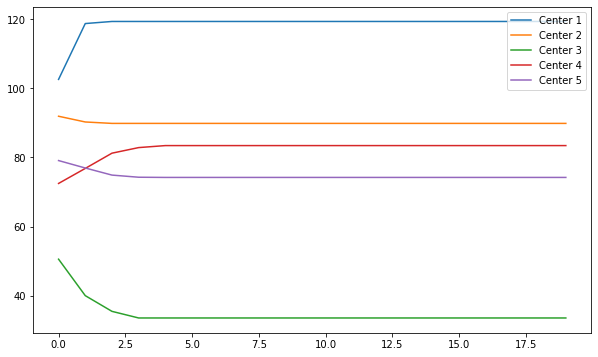

In [407]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)),mu1dis,label='Center 1')
plt.plot(np.array(range(iteration)),mu2dis,label='Center 2')
plt.plot(np.array(range(iteration)),mu3dis,label='Center 3')
plt.plot(np.array(range(iteration)),mu4dis,label='Center 4')
plt.plot(np.array(range(iteration)),mu5dis,label='Center 5')
plt.legend(loc='upper right')
plt.show()

In [335]:
loss_history[-1]

13.020126350791744

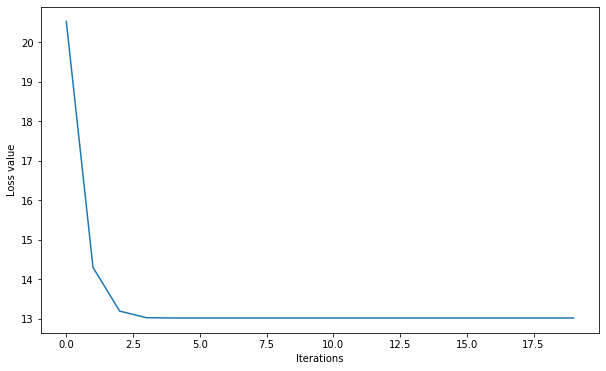

In [336]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

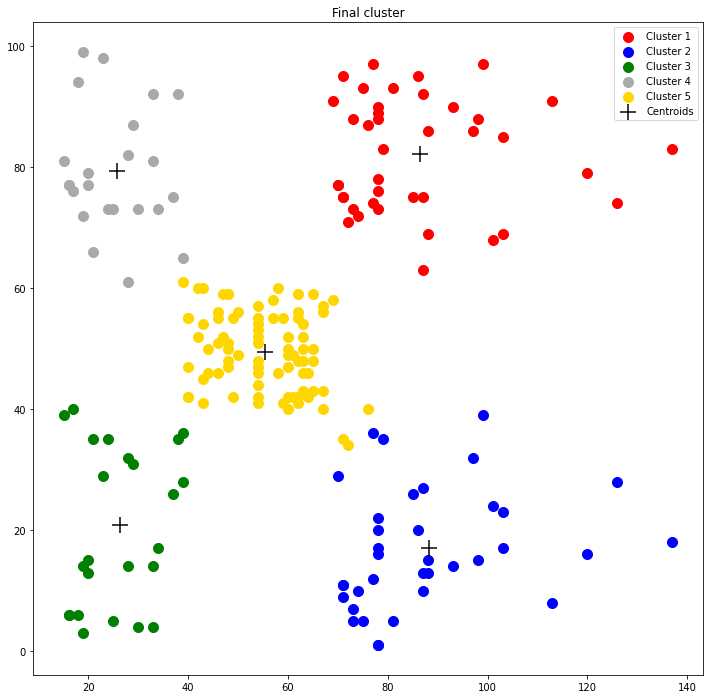

In [423]:
plt.figure(1,figsize=(12,12))
for fig1 in Cluster[1] :
  plt.scatter(fig1[0],fig1[1], s=100,c='red')
for fig1 in Cluster[2] :
  plt.scatter(fig1[0],fig1[1], s=100,c='blue')
for fig1 in Cluster[3] :
  plt.scatter(fig1[0],fig1[1], s=100,c='green') 
for fig1 in Cluster[4] :
  plt.scatter(fig1[0],fig1[1], s=100,c='darkgray') 
for fig1 in Cluster[5] :
  plt.scatter(fig1[0],fig1[1], s=100,c='gold')   

plt.title('Final cluster')
plt.scatter(Cluster[1][1][0],Cluster[1][1][1],s=100,c='red',label='Cluster 1')
plt.scatter(Cluster[2][1][0],Cluster[2][1][1],s=100,c='blue',label='Cluster 2')
plt.scatter(Cluster[3][1][0],Cluster[3][1][1],s=100,c='green',label='Cluster 3')
plt.scatter(Cluster[4][1][0],Cluster[4][1][1],s=100,c='darkgray',label='Cluster 4')
plt.scatter(Cluster[5][1][0],Cluster[5][1][1],s=100,c='gold',label='Cluster 5')
plt.scatter(centroid[:,0],centroid[:,1], s=260,c='black',marker='+', label='Centroids')
plt.legend(loc='best')

In [ ]:
cluster_init[5]

In [391]:
compute_centerdist(centroid_init[0],[0,0])

81.34682723777796

In [ ]:
def compute_centerdist(a,b) :
  Eud = (a[0] - b[0])**2 + (a[1]- b[1])**2
  dist = np.sqrt(Eud)
  return dist

a = np.array([[3],[4]])
b = np.array([[0],[0]])
compute_centerdist(a,b) #5

In [ ]:
def compute_label2(z, M) :
  clusters = {}
  for i in range(5) :
    clusters[i+1] = []
  for j in z :
    Distance = []
    for k in range(5) :
      Distance.append(compute_centerdist(j,M[k]))
    clusters[Distance.index(min(Distance))+1].append(j)
  return clusters

#OUTPUT

1.Plot the data points [1pt]

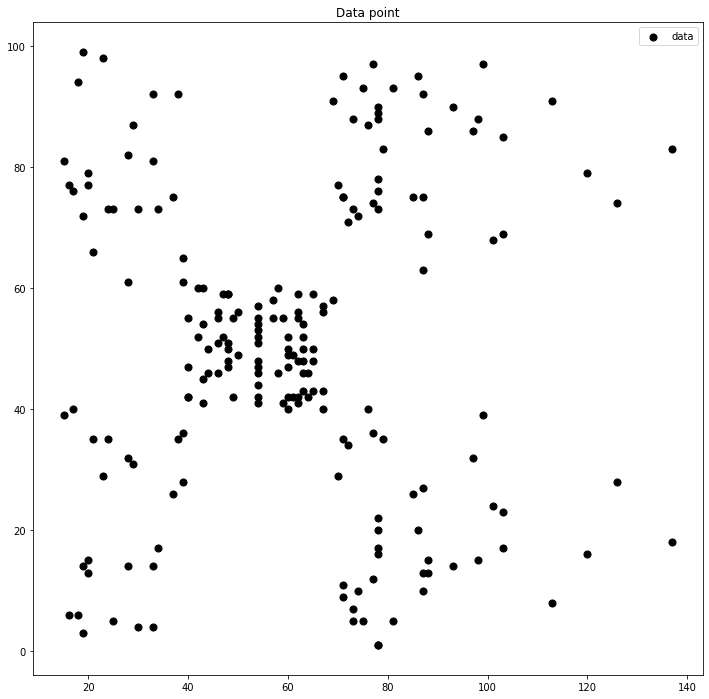

In [ ]:
plt.figure(1,figsize=(12,12))
plt.scatter(data[:,0], data[:,1], s=50, c='black', label ='data')
plt.title('Data point')
plt.legend(loc='best')
plt.show()

2. Visualise the initial condition of the point labels [1pt]

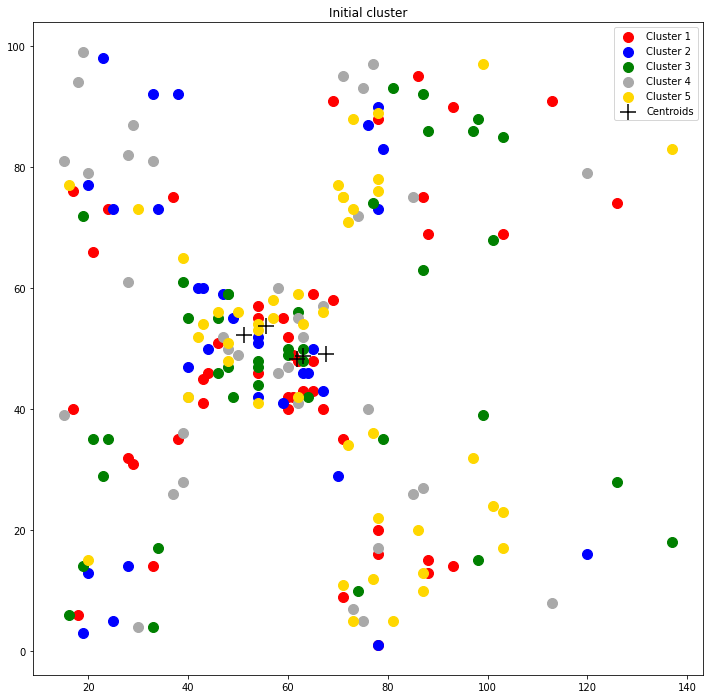

In [ ]:
plt.figure(1,figsize=(12,12))
plt.scatter(cluster_1[:,0], cluster_1[:,1], s= 100, c='red', label='Cluster 1')
plt.scatter(cluster_2[:,0], cluster_2[:,1], s= 100, c='blue', label='Cluster 2')
plt.scatter(cluster_3[:,0], cluster_3[:,1], s= 100, c='green', label='Cluster 3')
plt.scatter(cluster_4[:,0], cluster_4[:,1], s= 100, c='darkgray', label='Cluster 4')
plt.scatter(cluster_5[:,0], cluster_5[:,1], s= 100, c='gold', label='Cluster 5')
plt.scatter(centroid[:,0],centroid[:,1], s=260,c='black',marker='+', label='Centroids')
plt.title('Initial cluster')
plt.legend(loc='best')

3. Plot the loss curve [5pt]

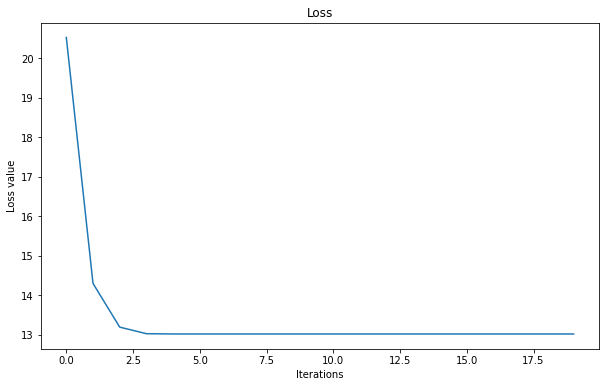

In [426]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.title('Loss')
plt.show()

4. Plot the centroid of each clsuter [5pt]

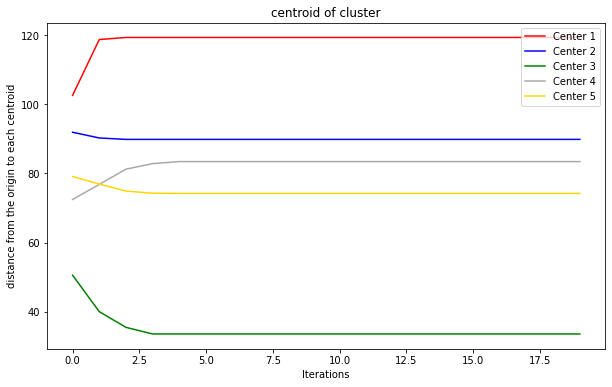

In [429]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)),mu1dis,label='Center 1',c='red')
plt.plot(np.array(range(iteration)),mu2dis,label='Center 2',c='blue')
plt.plot(np.array(range(iteration)),mu3dis,label='Center 3',c='green')
plt.plot(np.array(range(iteration)),mu4dis,label='Center 4',c='darkgray')
plt.plot(np.array(range(iteration)),mu5dis,label='Center 5',c='gold')
plt.xlabel('Iterations')
plt.ylabel('distance from the origin to each centroid')
plt.legend(loc='upper right')
plt.title('centroid of cluster')
plt.show()

5. Plot the final clustering result [5pt]

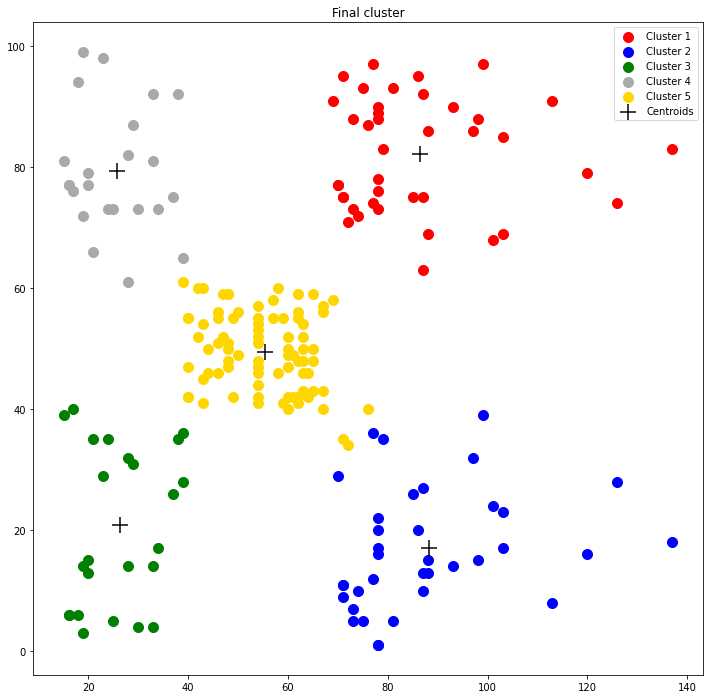

In [430]:
plt.figure(1,figsize=(12,12))
for fig1 in Cluster[1] :
  plt.scatter(fig1[0],fig1[1], s=100,c='red')
for fig1 in Cluster[2] :
  plt.scatter(fig1[0],fig1[1], s=100,c='blue')
for fig1 in Cluster[3] :
  plt.scatter(fig1[0],fig1[1], s=100,c='green') 
for fig1 in Cluster[4] :
  plt.scatter(fig1[0],fig1[1], s=100,c='darkgray') 
for fig1 in Cluster[5] :
  plt.scatter(fig1[0],fig1[1], s=100,c='gold')   

plt.title('Final cluster')
plt.scatter(Cluster[1][1][0],Cluster[1][1][1],s=100,c='red',label='Cluster 1')
plt.scatter(Cluster[2][1][0],Cluster[2][1][1],s=100,c='blue',label='Cluster 2')
plt.scatter(Cluster[3][1][0],Cluster[3][1][1],s=100,c='green',label='Cluster 3')
plt.scatter(Cluster[4][1][0],Cluster[4][1][1],s=100,c='darkgray',label='Cluster 4')
plt.scatter(Cluster[5][1][0],Cluster[5][1][1],s=100,c='gold',label='Cluster 5')
plt.scatter(centroid[:,0],centroid[:,1], s=260,c='black',marker='+', label='Centroids')
plt.legend(loc='best')